In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (2).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (94).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (380).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (652).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (239).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (511).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (181).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (69).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (248).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (750).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (439).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-Sagittal/MS-S (343).png
/kaggle/input/multiple-sclerosis/Multiple Sclerosis/MS-S

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
%matplotlib inline


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
trainpath='/kaggle/input/intel-image-classification/seg_train'

In [4]:
import os
import glob as gb

# Specify the base directory path
base_path = '/kaggle/input/multiple-sclerosis'

# Construct the full path to the 'seg_train' directory
train_path = os.path.join(base_path, 'Multiple Sclerosis')

# Get the list of folders in the 'seg_train' directory
folders = os.listdir(train_path)

# Iterate over the folders
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    
    # Print the number of files found in the current folder
    print(f"For training data, found {len(files)} in folder {folder}")



For training data, found 761 in folder MS-Sagittal
For training data, found 650 in folder MS-Axial
For training data, found 1014 in folder Control-Sagittal
For training data, found 1002 in folder Control-Axial


In [5]:
size = []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(569, 1158, 4)    2764
(638, 1222, 4)     425
(628, 1158, 4)     170
(695, 1222, 4)      46
(661, 1493, 4)      14
(618, 758, 4)        2
(719, 1493, 4)       2
(687, 912, 4)        1
(543, 487, 4)        1
(606, 722, 4)        1
(515, 450, 4)        1
Name: count, dtype: int64

In [6]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [7]:
import cv2

In [8]:
s = 150

In [9]:
x_train= []
y_train= []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])


In [10]:
print(f'we have {len(x_train)} in x_train')

we have 3427 in x_train


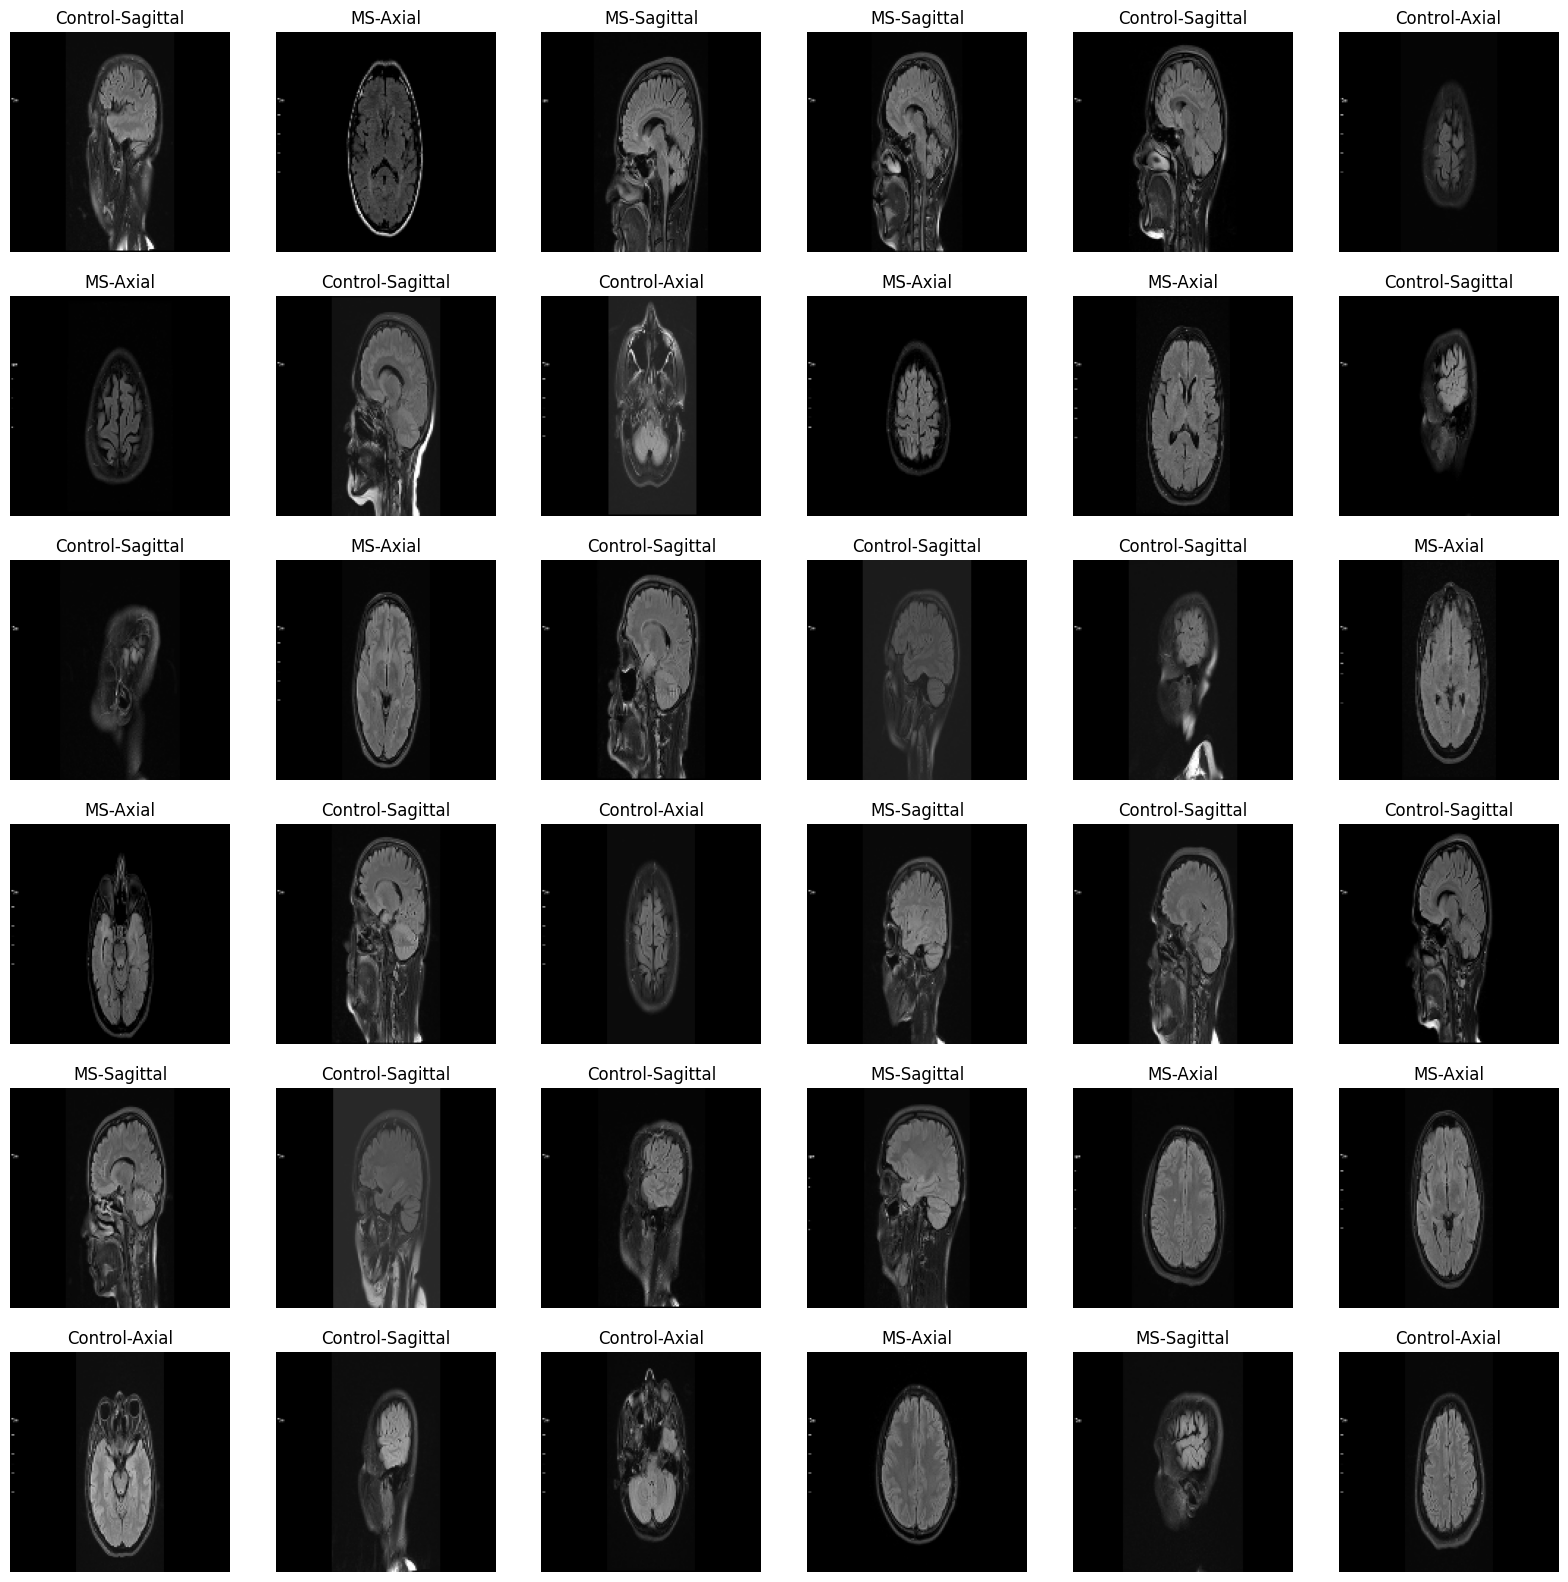

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 150, 150, 3)
y_train shape is (3427,)


In [13]:
from keras.layers import MaxPooling2D,Dropout

Epoch 1/30
69/69 [==============================] - 15s 40ms/step - loss: 1.3729 - accuracy: 0.2874 - val_loss: 1.3761 - val_accuracy: 0.2847
Epoch 2/30
69/69 [==============================] - 2s 25ms/step - loss: 1.3682 - accuracy: 0.3052 - val_loss: 1.3714 - val_accuracy: 0.2993
Epoch 3/30
69/69 [==============================] - 2s 25ms/step - loss: 1.3717 - accuracy: 0.3043 - val_loss: 1.3743 - val_accuracy: 0.2847
Epoch 4/30
69/69 [==============================] - 2s 25ms/step - loss: 1.3713 - accuracy: 0.3079 - val_loss: 1.3717 - val_accuracy: 0.2847
Epoch 5/30
69/69 [==============================] - 2s 25ms/step - loss: 1.3705 - accuracy: 0.2892 - val_loss: 1.3710 - val_accuracy: 0.2993
Epoch 6/30
69/69 [==============================] - 2s 24ms/step - loss: 1.3693 - accuracy: 0.3034 - val_loss: 1.3723 - val_accuracy: 0.2993
Epoch 7/30
69/69 [==============================] - 2s 25ms/step - loss: 1.3681 - accuracy: 0.3066 - val_loss: 1.3714 - val_accuracy: 0.2993
Epoch 8/30
6

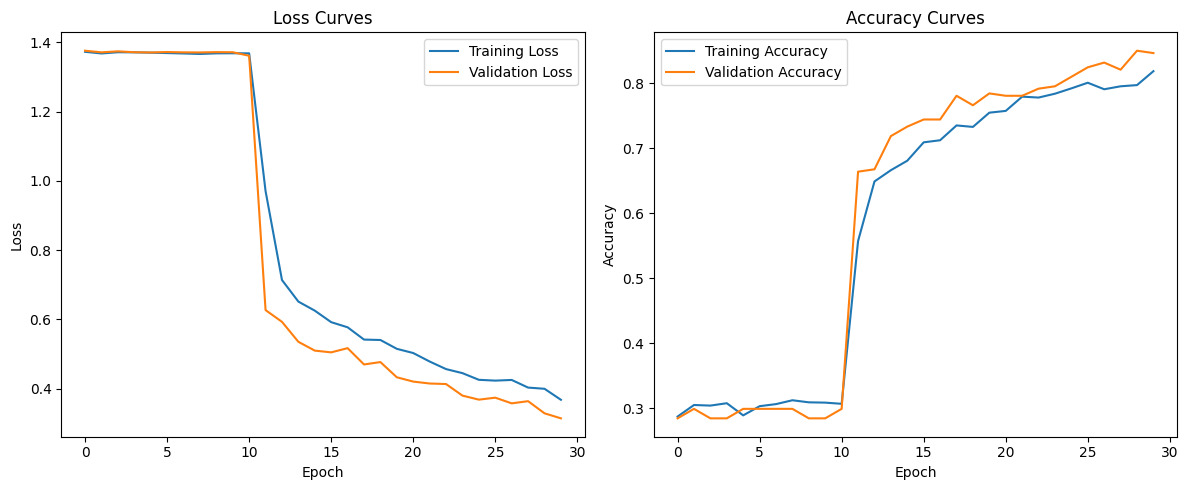

In [15]:

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Split the data into training and validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Number of classes
num_classes = 4  # Change this to the number of classes in your dataset

# Step 2: Architecture Design
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(s, s, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with the number of classes

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# One-hot encode the target labels
y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

# Step 5: Training
history = model.fit(x_train, y_train_encoded,
                    batch_size=32,
                    epochs=30,
                    validation_data=(x_val, y_val_encoded))

# Evaluate the model on the test set
y_test_encoded = to_categorical(y_test, num_classes)
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()


In [17]:
# Step 6: Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)

# Print test accuracy

print("Test accuracy:", test_accuracy)

9/9 [==============================] - 0s 11ms/step - loss: 0.3076 - accuracy: 0.8764
Test accuracy: 0.8763636350631714


9/9 [==============================] - 0s 9ms/step
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.85      0.96      0.90        80
     Class 1       0.81      1.00      0.90        73
     Class 2       0.93      0.75      0.83        55
     Class 3       1.00      0.75      0.85        67

    accuracy                           0.88       275
   macro avg       0.90      0.86      0.87       275
weighted avg       0.89      0.88      0.87       275

Weighted Precision: 0.8915
Weighted Recall: 0.8764
Weighted F1-score: 0.8737


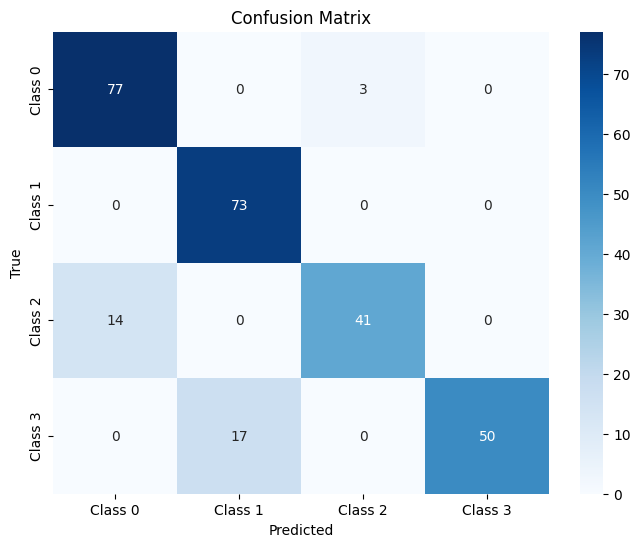

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Assuming you have already trained and evaluated your model, and you have true_labels
true_labels = y_test  # True labels from your test set

# Predict probabilities using the model
predicted_probabilities = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate and print classification report
report = classification_report(true_labels, predicted_labels, target_names=[f'Class {i}' for i in range(num_classes)])
print("Classification Report:\n", report)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)],
            yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [22]:
from tensorflow.keras.models import load_model
model.save("cnn_task3.h5")